In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the hidden layer
hidden = Dense(784, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hidden)

In [3]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
469/469 [==============================] - 13s 25ms/step - loss: 0.3414 - accuracy: 0.0120 - val_loss: 0.2856 - val_accuracy: 0.0088
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.3041 - accuracy: 0.0150 - val_loss: 0.2660 - val_accuracy: 0.0101
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.2975 - accuracy: 0.0176 - val_loss: 0.2551 - val_accuracy: 0.0106
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2940 - accuracy: 0.0203 - val_loss: 0.2479 - val_accuracy: 0.0099
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2920 - accuracy: 0.0231 - val_loss: 0.2436 - val_accuracy: 0.0129
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2907 - accuracy: 0.0242 - val_loss: 0.2405 - val_accuracy: 0.0118
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2899 - accuracy: 0.0259 - val_loss: 0.2386 - val_accuracy:

In [6]:
reconstructed_data = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


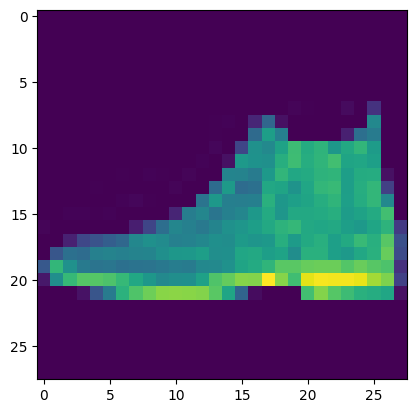

In [7]:
plt.imshow(x_test[0].reshape(28, 28))

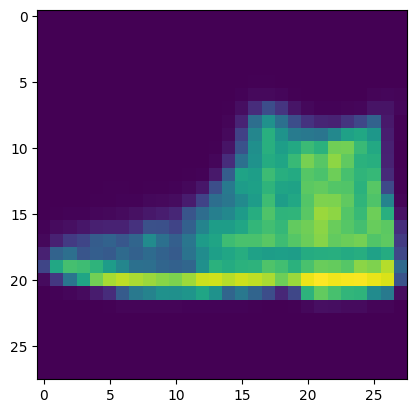

In [8]:
plt.imshow(reconstructed_data[0].reshape(28, 28))

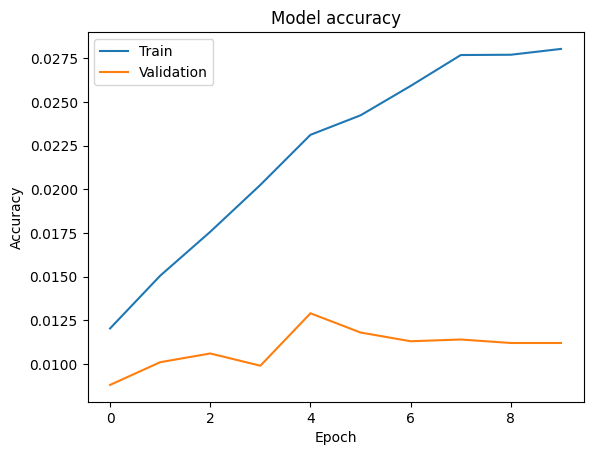

In [9]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

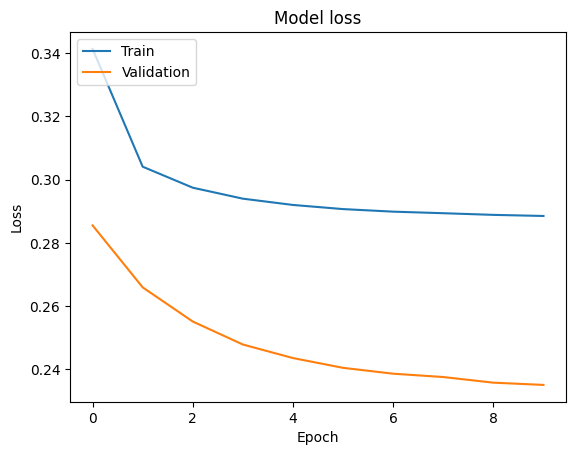

In [10]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()